# 10. Neural Networks with MNIST

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision.datasets as dsets
import torchvision.transforms as transforms

import numpy as np
import random

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 10.1 Prepare MNIST Data

In [3]:
train_data = dsets.MNIST(root='data/',
                         train=True,
                         transform=transforms.ToTensor(),
                         download=True)

test_data = dsets.MNIST(root='data/',
                        train=False,
                        transform=transforms.ToTensor(),
                        download=True)

In [4]:
train_data.data.size(), test_data.data.size()

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

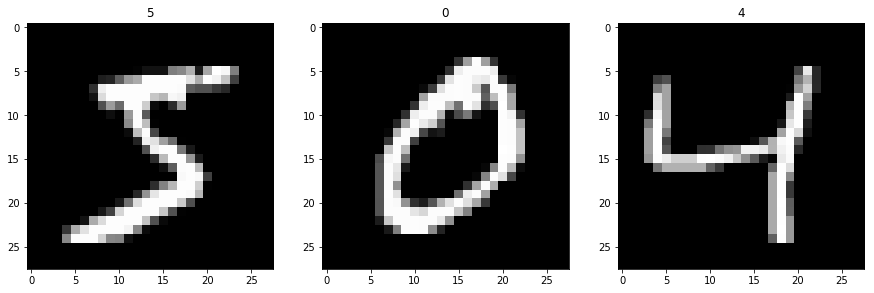

In [5]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.set_title(train_data.targets[0].item())
ax1.imshow(train_data.data[0,:,:].numpy(), cmap='gray')

ax2.set_title(train_data.targets[1].item())
ax2.imshow(train_data.data[1,:,:].numpy(), cmap='gray')

ax3.set_title(train_data.targets[2].item())
ax3.imshow(train_data.data[2,:,:].numpy(), cmap='gray')

## 10.2 Make Batch Loader

In [6]:
batch_size = 100

train_loader  = DataLoader(dataset=train_data,
                           batch_size=batch_size,
                           shuffle=True,
                           num_workers=1)

In [7]:
for i in range(3) :
    batch_images, batch_labels = next(iter(train_loader))
    print(batch_labels.numpy(), ", ", len(batch_labels.numpy()))

[8 1 3 9 6 9 6 8 2 2 4 6 3 8 3 2 9 4 1 8 6 8 4 2 3 9 1 2 4 2 8 4 3 0 1 7 0
 3 7 7 2 7 9 1 8 8 3 4 7 6 2 2 3 0 6 0 7 1 8 1 4 6 9 3 1 5 9 2 2 4 6 3 5 7
 0 8 9 0 0 9 4 1 1 4 2 8 7 0 5 4 5 6 5 6 1 9 9 4 8 3] ,  100
[5 9 4 1 2 2 0 9 4 7 8 8 9 5 0 7 3 4 2 4 3 3 9 8 1 4 2 3 5 1 8 1 4 6 0 5 8
 9 2 8 0 2 7 0 5 8 6 4 0 4 7 2 6 1 9 8 9 4 0 7 8 4 9 0 8 3 8 3 4 8 4 7 6 1
 9 4 5 0 5 1 2 4 3 1 0 1 7 4 9 6 8 6 9 0 0 0 3 0 1 2] ,  100
[1 1 1 4 0 2 4 7 0 0 9 7 0 3 3 6 2 9 0 7 4 9 9 3 5 2 1 8 2 5 3 6 6 6 7 3 4
 0 7 4 7 4 4 6 3 8 6 6 3 7 2 4 5 2 2 2 5 5 0 7 2 0 6 7 5 3 3 0 7 6 1 8 9 2
 7 8 5 1 3 3 9 5 2 8 9 0 9 1 0 2 0 6 2 4 4 7 2 0 3 3] ,  100


In [8]:
batch_images[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

## 10.3 Define Model

In [9]:
model = torch.nn.Sequential(
    torch.nn.Linear(784, 512),
    torch.nn.ReLU(),
    torch.nn.Linear(512, 10)
)

In [10]:
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# def cross_entropy(input, target, weight=None, size_average=True, ignore_index=-100, reduce=True):

# Args:
#     input: Variable :math:`(N, C)` where `C = number of classes`
#     target: Variable :math:`(N)` where each value is
#         `0 <= targets[i] <= C-1`
#     weight (Tensor, optional): a manual rescaling weight given to each

## 10.4 Train Model

In [11]:
num_epochs = 5

In [12]:
for epoch in range(num_epochs):
    
    total_batch = len(train_data) // batch_size
    
    for i, (batch_images, batch_labels) in enumerate(train_loader):
        
        X = batch_images.view(-1, 28 * 28)
        Y = batch_labels
        
        pre = model(X)
        cost = loss(pre, Y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        if (i+1) % 300 == 0:
            print('Epoch [%d/%d], lter [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.item()))
    
print("Learning Finished!")

Epoch [1/5], lter [300/600], Loss: 2.2285
Epoch [1/5], lter [600/600], Loss: 2.1534
Epoch [2/5], lter [300/600], Loss: 2.1053
Epoch [2/5], lter [600/600], Loss: 1.9630
Epoch [3/5], lter [300/600], Loss: 1.9005
Epoch [3/5], lter [600/600], Loss: 1.8460
Epoch [4/5], lter [300/600], Loss: 1.6978
Epoch [4/5], lter [600/600], Loss: 1.5562
Epoch [5/5], lter [300/600], Loss: 1.4177
Epoch [5/5], lter [600/600], Loss: 1.3601
Learning Finished!


## 10.5 Test Model

In [13]:
model.eval()

correct = 0
total = 0

for images, labels in test_data:
    
    images  = images.view(-1, 28 * 28)
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    total += 1
    correct += (predicted == labels).sum()
    
print('Accuracy of test images: %f %%' % (100 * float(correct) / total))

Accuracy of test images: 78.820000 %


In [14]:
r = random.randint(0, len(test_data)-1)
X_single_data = test_data.data[r:r + 1].view(-1,28*28).float()
Y_single_data = test_data.targets[r:r + 1]

Label :  [3]
Prediction :  [3]


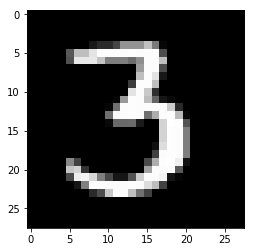

In [15]:
single_pre = model(X_single_data)
plt.imshow(X_single_data.data.view(28,28).numpy(), cmap='gray')

print('Label : ', Y_single_data.data.view(1).numpy())
print('Prediction : ', torch.max(single_pre.data, 1)[1].numpy())

## 10.6 Black Box

Prediction :  [2]


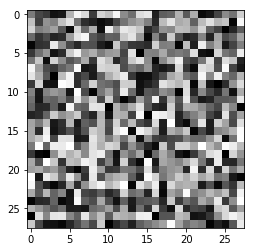

In [16]:
blackbox = torch.rand(X_single_data.size())
blackbox_pre = model(blackbox)

plt.imshow(blackbox.data.view(28,28).numpy(), cmap='gray')

print('Prediction : ', torch.max(blackbox_pre.data, 1)[1].numpy())